# Una versione "semplificata" del moto dei due corpi

Note iniziali: Il problema viene risolto con l'uso delle differenze finite. 

Per il calcolo delle condizioni iniziali non si è tenuto conto della conservazione del momento angolare ma solo della quantità di moto. La velocità della massa "piccola" viene inizializzata tangenziale, solo componente y.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
#dati iniziali
k = 1.5
M = 30.0
m = 0.5
x0m = 3.0
y0m = 0.0
vy0m = 2.5
dt = 0.0125
n = 2000

In [11]:
#massa "piccola"
pxm = []
pxm.append(x0m)
xm = x0m
pym = []
pym.append(y0m)
ym = y0m
vxm = 0
vym = vy0m

La posizione $x$ della massa M viene calcolata sfruttando la definizione di centro di massa, che viene fissato nell'origine: $m \cdot x_{0_m}+M \cdot x_{0_M}=0$

La velocità iniziale di M viene in una prima approssimazione sfruttando la conservazione della quantità di moto:
$$
\begin{array}{ll}
    m \cdot v_{x_m}+M \cdot v_{x_M}=0 & m \cdot v_{y_m}+M \cdot v_{y_M}=0
\end{array}
$$

In [12]:
#massa "grande"
pxM = []
pxM.append(-(m/M)*x0m)
xM = -(m/M)*x0m
pyM = []
pyM.append(-(m/M)*y0m)
yM = -(m/M)*y0m
vxM = 0
vyM = -(m/M)*vym

l'accelerazione si calcola utilizzando:
$$
    F=k\dfrac{m \cdot M}{d^2}
$$
E sfruttando la similitudine fra il triangolo formato delle componenti della forza e il triangolo della posizione della massa (vedi figura): <img src="figure/duemasse.png" width="500" height="600">

detto $d=\sqrt{(x_m-x_M)^2+(y_m-y_M)^2}$ si può costruire, ad esempio per la componente $x$, la seguente proporzione:
$$
    \dfrac{\left|\vec{F} \right|}{d}=\dfrac{\left|\vec{F_x} \right|}{\left|x_M-x_m \right|} \; \Rightarrow \;
    \left|\vec{F_x} \right|=\left|x_M-x_m \right| \dfrac{\left|\vec{F} \right|}{d} \; \Rightarrow \; 
    \left|\vec{F_x} \right|=\left|x_M-x_m \right|\left( k \dfrac{m \cdot M}{d^3} \right)
$$

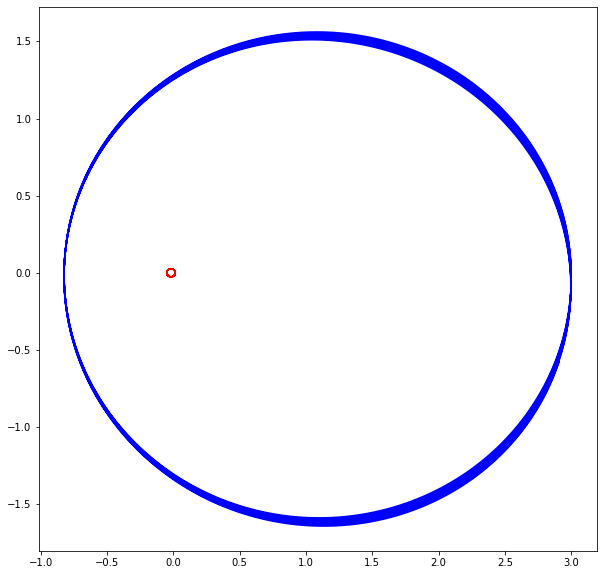

In [9]:
for i in range(0,n):
    #d distanza fra le masse
    d = math.sqrt(math.pow(xm-xM, 2)+math.pow(ym-yM, 2))
    """calcolo accelerazione si usa la legge di
    gravitazione universale"""
    axm = -k*M*(xm-xM)/math.pow(d, 3)
    aym = -k*M*(ym-yM)/math.pow(d, 3)
    axM = -k*m*(-xm+xM)/math.pow(d, 3)
    ayM = -k*m*(-ym+yM)/math.pow(d, 3)
    """calcolo della velocità si usano le
    differenze finite: si ipotezza il moto
    nell'intervallo di tempo dt ad accelerazione
    costante"""
    vxm = vxm+axm*dt
    vym = vym+aym*dt
    vxM = vxM+axM*dt
    vyM = vyM+ayM*dt
    """calcolo della posizione si usano le
    differenze finite: si ipotezza il moto
    nell'intervallo di tempo dt a velocità
    costante"""
    xm = xm+vxm*dt
    pxm.append(xm)
    ym = ym+vym*dt
    pym.append(ym)
    xM = xM+vxM*dt
    pxM.append(xM)
    yM = yM+vyM*dt
    pyM.append(yM)
pxm = np.array(pxm,dtype=np.float64)
pym = np.array(pym,dtype=np.float64)
pxM = np.array(pxM,dtype=np.float64)
pyM = np.array(pyM,dtype=np.float64)
plt.figure(figsize=(10,10))
#plt.xlim([0,n+100])
#plt.ylim([2.8,3.4])
plt.plot(pxm, pym, 'b-',pxM,pyM,'r-')
plt.show()